In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from util import chissl_mongo as cm
%load_ext autoreload
%autoreload 2

In [87]:
from sklearn.datasets import load_digits

data = load_digits()

df = pd.DataFrame({
    'features': data.data.astype('int').tolist(),
    '_id': np.arange(len(images)).astype('str')
})

df.head()

,_id,features
0,0,"[0, 0, 5, 13, 9, 1, 0, 0, 0, 0, 13, 15, 10, 15..."
1,1,"[0, 0, 0, 12, 13, 5, 0, 0, 0, 0, 0, 11, 16, 9,..."
2,2,"[0, 0, 0, 4, 15, 12, 0, 0, 0, 0, 3, 16, 15, 14..."
3,3,"[0, 0, 7, 15, 13, 1, 0, 0, 0, 8, 13, 6, 15, 4,..."
4,4,"[0, 0, 0, 1, 11, 0, 0, 0, 0, 0, 0, 7, 8, 0, 0,..."


In [89]:
from util.image import img2base64

df['src'] = df.features\
    .apply(lambda xi: ((16*(16 - np.array(xi)) - 1).reshape((8,8))).clip(0, 255).astype(np.uint8))\
    .apply(Image.fromarray, mode='L')\
    .apply(Image.Image.resize,
           size=(100, 100),
           resample=Image.BICUBIC)\
    .apply(img2base64)
    
df.head()

,_id,features,src
0,0,"[0, 0, 5, 13, 9, 1, 0, 0, 0, 0, 13, 15, 10, 15...","{'type': 'image/png', 'data': '/9j/4AAQSkZJRgA..."
1,1,"[0, 0, 0, 12, 13, 5, 0, 0, 0, 0, 0, 11, 16, 9,...","{'type': 'image/png', 'data': '/9j/4AAQSkZJRgA..."
2,2,"[0, 0, 0, 4, 15, 12, 0, 0, 0, 0, 3, 16, 15, 14...","{'type': 'image/png', 'data': '/9j/4AAQSkZJRgA..."
3,3,"[0, 0, 7, 15, 13, 1, 0, 0, 0, 8, 13, 6, 15, 4,...","{'type': 'image/png', 'data': '/9j/4AAQSkZJRgA..."
4,4,"[0, 0, 0, 1, 11, 0, 0, 0, 0, 0, 0, 7, 8, 0, 0,...","{'type': 'image/png', 'data': '/9j/4AAQSkZJRgA..."


In [131]:
from util import chissl_mongo as cm

cm.ChisslMongo()\
    .create_collection('Digits', df.to_dict(orient='records'), drop=True)

In [132]:
cm.ChisslMongo()\
    .create_application('Digits',
                        'Digits',
                        'ImageComponent',
                        'util.pipelines.DigitsPipeline',
                        drop=True)

{'_id': 'Digits',
 'collection': 'Digits',
 'component': 'ImageComponent',
 'pipeline': 'util.pipelines.DigitsPipeline'}

In [133]:
obj = cm.ChisslMongo(verbose=True)\
    .create_model('Digits',
                  'test', drop=True)

Finding application <Digits>...OK
Querying collection <Digits>...found 1797...OK
Transforming data...OK
Clustering data...OK
done.


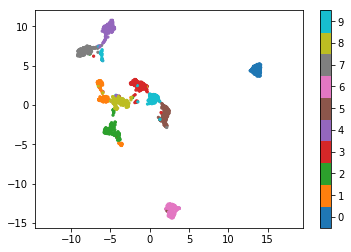

In [136]:
plt.scatter(*np.array(obj['X']).T, s=5, c=data.target, cmap='tab10', vmax=10)
plt.axis('equal')
cb = plt.colorbar()
cb.set_ticks(np.arange(10) + .5)
cb.set_ticklabels(np.arange(10).astype('str'))